# Importing the necessary libraries

In [129]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import os
from datetime import datetime
from scipy.stats import randint
# to supress warnings
import warnings
warnings.filterwarnings('ignore')

# libraries for EDA
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import sweetviz
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# libraries for Pre-Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
from sklearn.decomposition import PCA

# libraries for Over-Sampling, Data split, Hyper-Parameter Tuning, Cross Validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

# libraries for ML Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# libraries for model performance metrics 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, f1_score, roc_auc_score

# library for saving the best model 
import pickle

# library for AUTO ML
from tpot import TPOTClassifier

# Fetch/Read the Dataset

In [130]:
df = pd.read_csv("E:/iNeuron/Internship/data.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [131]:
df.rename(columns={df.columns[0]:"Patient ID"},inplace=True)   

In [132]:
df.head()

,Patient ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,5,47,80,101,88,73,69,41,-13,-31,-61,-80,-77,-66,-43,5,87,129,121,88,12,-76,-150,-207,-186,-165,-148,-103,-33,40,94,75,8,-81,-155,-227,-262,-233,-218,-187,-126,-65,-12,27,61,49,9,-46,-124,-210,-281,-265,-181,-89,-4,53,53,38,43,31,34,9,-7,-34,-70,-84,-101,-70,-11,42,62,66,74,64,59,56,36,-11,-30,-43,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,283,301,308,285,252,215,194,169,111,-74,-388,-679,-892,-949,-972,-1001,-1006,-949,-847,-668,-432,-153,72,226,326,392,461,495,513,511,496,479,453,440,427,414,399,385,385,404,432,444,437,418,392,373,363,365,372,385,388,383,371,360,353,334,303,252,200,153,151,143,48,-206,-548,-859,-1067,-1069,-957,-780,-597,-460,-357,-276,-224,-210,-350,-930,-1413,-1716,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,-82,-57,-38,-40,-36,-31,-13,11,19,9,-20,-48,-71,-71,-57,-32,-13,6,29,27,25,10,-7,-36,-47,-37,-36,-22,-32,-38,-55,-61,-64,-72,-67,-53,-25,-10,-4,-23,-55,-93,-102,-106,-101,-69,-45,-42,-57,-64,-77,-80,-77,-78,-56,-34,-5,10,5,-5,-44,-75,-99,-110,-104,-103,-94,-105,-108,-110,-99,-89,-82,-76,-80,-90,-106,-106,-108,-87,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,-74,-70,-71,-82,-88,-93,-97,-89,-87,-83,-70,-50,-37,-31,-32,-39,-54,-64,-68,-67,-69,-63,-60,-63,-55,-43,-37,-27,-31,-35,-47,-58,-63,-74,-73,-67,-60,-56,-49,-46,-57,-58,-62,-63,-63,-61,-56,-65,-62,-57,-61,-63,-66,-69,-86,-89,-86,-83,-87,-80,-69,-62,-57,-60,-60,-68,-58,-53,-57,-66,-66,-73,-78,-73,-84,-92,-97,-88,-81,-72,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,-47,-45,-37,-3,23,39,27,0,-28,-44,-37,-22,5,30,31,6,-32,-27,-27,2,13,-6,-29,-41,-22,-13,-16,-31,-52,-60,-40,-16,0,14,24,36,3

In [133]:
df.shape

(11500, 180)

In [134]:
#Checking for Missing Values
missing_val = df.isnull().sum()
missing_val = pd.DataFrame(missing_val, index=None, columns=['Features'])
print("*"*100)
print("No of features with missing values {}".format(len(missing_val.iloc[np.where(missing_val['Features'] > 0)])))
print("*"*100)

****************************************************************************************************
No of features with missing values 0
****************************************************************************************************


In [135]:
#Dropping Feature which is just an unique identifier and will not contributing much to dependent variable
df.drop(['Patient ID'], axis = 1, inplace = True)

In [136]:
#Converting Multi class problem into binary class since 1 is having disease and rest all [2 to 5] doesn't has disease
y_val = {1:1, 2:0, 3:0, 4:0, 5:0}
df['target_var'] = df['y'].map(y_val)

In [137]:
df.drop(['y'], axis = 1, inplace = True)

In [138]:
#Checking for Duplicate columns
print("*"*100)
print("Number of Duplicate rows in our dataset : {}".format(df.duplicated().sum()))
print("*"*100)

****************************************************************************************************
Number of Duplicate rows in our dataset : 0
****************************************************************************************************


****************************************************************************************************
0    9200
1    2300
Name: target_var, dtype: int64
****************************************************************************************************




<AxesSubplot:>

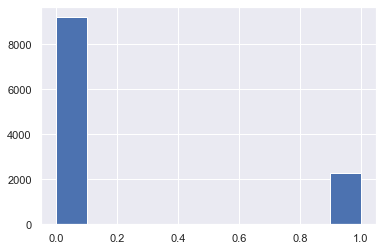

In [140]:
print("*"*100)
print(df['target_var'].value_counts())
print("*"*100)
print("\n")
df['target_var'].hist()

In [141]:
#Checking for data types
x = pd.DataFrame(df.dtypes, columns = ['Dtypes'])
print(x['Dtypes'].value_counts())
print("")
print("*"*100)
print("All data types are integer. Which also means we don't have nan values but still let's check")
print("*"*100)

int64    179
Name: Dtypes, dtype: int64

****************************************************************************************************
All data types are integer. Which also means we don't have nan values but still let's check
****************************************************************************************************


************************************************************************************************************************
Findings:
Target class is imbalance we will use SMOTE, and weights method to handle imbalance at the time of model training
************************************************************************************************************************


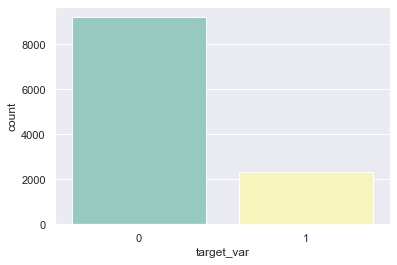

In [142]:
#Checking target variable class distribution
sns.countplot(x=df['target_var'], palette = 'Set3')
print("*"*120)
print("Findings:\nTarget class is imbalance we will use SMOTE, and weights method to handle imbalance at the time of model training")
print("*"*120)
os.chdir("E:\iNeuron\Internship\Plots")

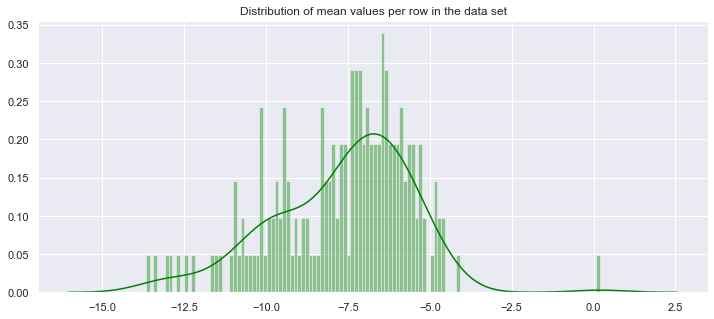

************************************************************************************************************************
Findings:
Data is somewhat normally distributed in terms of mean values per rows in the dataset, it is not completely skewed
************************************************************************************************************************


<Figure size 432x288 with 0 Axes>

In [145]:
plt.figure(figsize = (12,5))
features = df.columns.values[0:179]
plt.title("Distribution of mean values per row in the data set")
sns.distplot(df[features].mean(axis=0),color="green",kde=True,bins=120)
plt.show()
plt.savefig('Mean_values_per_row_plot')
print("*"*120)
print("Findings:\nData is somewhat normally distributed in terms of mean values per rows in the dataset, it is not completely skewed")
print("*"*120)

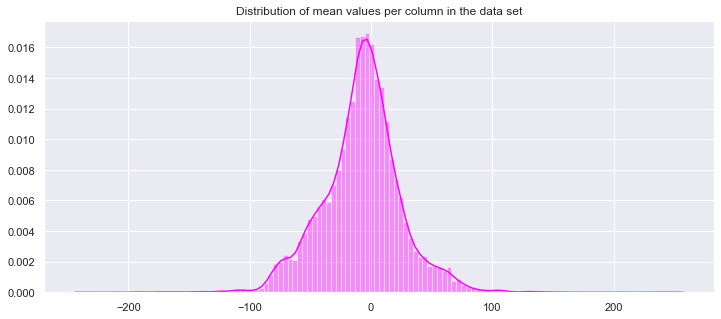

************************************************************************************************************************
Findings:
Data is normally distributed in terms of mean values per columns in the dataset
************************************************************************************************************************


In [146]:
plt.figure(figsize = (12,5))
plt.title("Distribution of mean values per column in the data set")
sns.distplot(df[features].mean(axis=1), color = "magenta", kde=True, bins=120)
plt.show()
print("*"*120)
print("Findings:\nData is normally distributed in terms of mean values per columns in the dataset")
print("*"*120)

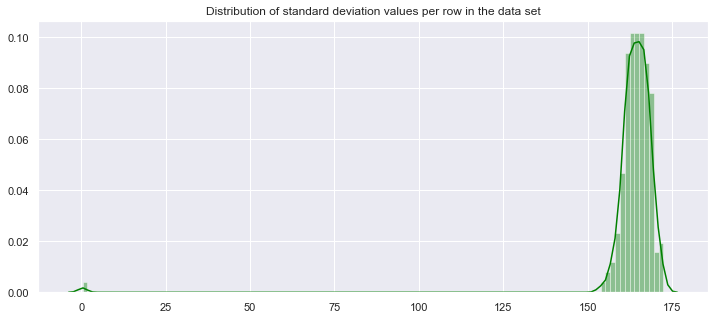

************************************************************************************************************************
Findings:
Data is left skewed with respect to standard deviation per row in the dataset
************************************************************************************************************************


In [147]:
plt.figure(figsize = (12,5))
features = df.columns.values[0:179]
plt.title("Distribution of standard deviation values per row in the data set")
sns.distplot(df[features].std(axis=0),color="green",kde=True,bins=120)
plt.show()
print("*"*120)
print("Findings:\nData is left skewed with respect to standard deviation per row in the dataset")
print("*"*120)

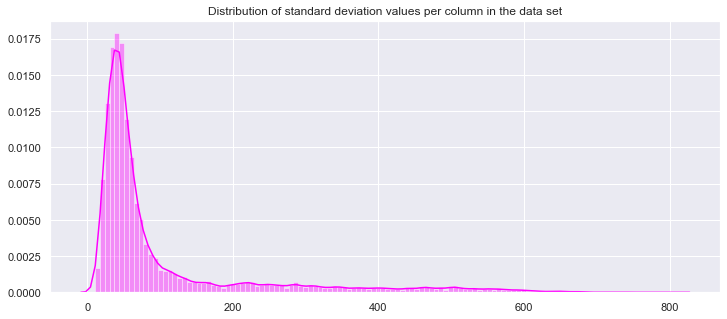

************************************************************************************************************************
Data is right skewed with respect to standard deviation per column in the dataset
************************************************************************************************************************


In [148]:
plt.figure(figsize = (12,5))
features = df.columns.values[0:179]
plt.title("Distribution of standard deviation values per column in the data set")
sns.distplot(df[features].std(axis=1),color="magenta",kde=True,bins=120)
plt.show()
print("*"*120)
print("Data is right skewed with respect to standard deviation per column in the dataset")
print("*"*120)

*******************************************************************************************************************************


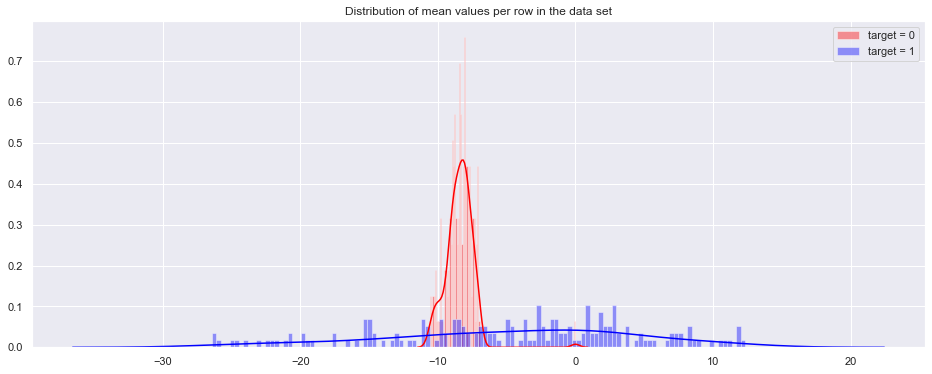

*******************************************************************************************************************************
Data distribution with respect to dependent variable in the majority and minority class seems to be evenly spread with respect to the mean in the dataset
*******************************************************************************************************************************


In [149]:
print("*"*127)
t0 = df.loc[df['target_var'] == 0]
t1 = df.loc[df['target_var'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the data set")
sns.distplot(t0[features].mean(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); 
plt.show()
print("*"*127)
print("Data distribution with respect to dependent variable in the majority and minority class seems to be evenly spread with respect to the mean in the dataset")
print("*"*127)

*******************************************************************************************************************************


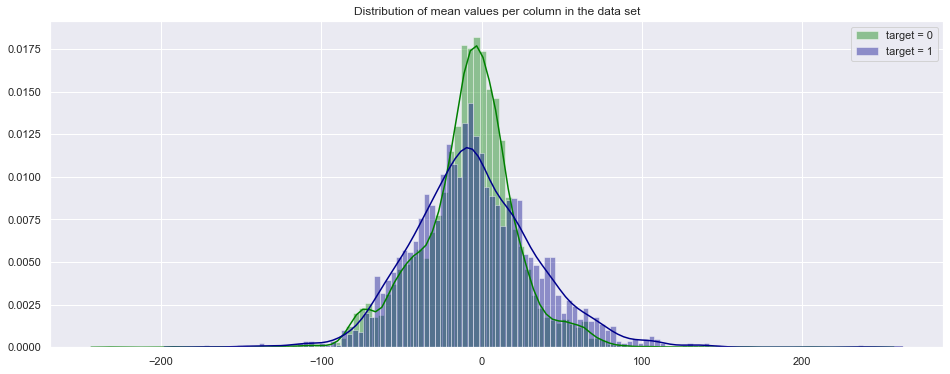

*******************************************************************************************************************************
Data distribution with respect to dependent variable in the majority and minority class seems to be evenly spread with respect to the mean in the dataset
*******************************************************************************************************************************


In [150]:
print("*"*127)
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the data set")
sns.distplot(t0[features].mean(axis=1),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend()
plt.show()
print("*"*127)
print("Data distribution with respect to dependent variable in the majority and minority class seems to be evenly spread with respect to the mean in the dataset")
print("*"*127)

# From the above EDA we can conclude that our data set is normally distributed wrt to mean but is skewed wrt to standard deviation. So we need to scale down the data

In [151]:
print("*"*100)
print("Checking for the Co-relation Matris between the variables")
print("*"*100)

****************************************************************************************************
Checking for the Co-relation Matris between the variables
****************************************************************************************************


In [152]:
df.iloc[:,0:178].corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,0.040119,0.035647,0.009950,-0.027824,-0.067519,-0.103498,-0.129956,-0.140550,-0.136456,-0.116471,-0.089462,-0.059348,-0.032130,-0.003778,0.022393,0.045038,0.065780,0.085341,0.106417,0.122688,0.129460,0.121796,0.101925,0.076640,0.050850,0.025857,0.003230,-0.015046,-0.030440,-0.046574,-0.062712,-0.075312,-0.080657,-0.081316,-0.076653,-0.065909,-0.053789,-0.038625,-0.027788,-0.019087,-0.013186,-0.000380,0.010858,0.023184,0.032076,0.031031,0.014192,-0.007301,-0.022245,-0.027471,-0.018613,-0.010542,-0.004924,-0.003033,-0.003401,-0.007237,-0.011722,-0.015193,-0.012204,-0.002460,0.003820,0.008086,0.008387,0.004319,-0.000139,-0.009274,-0.014786,-0.017248,-0.016809,-0.009709,-0.001349,0.007380,0.014173,0.017649,0.018549,0.018214,0.018163,0.016358,0.015589,0.011035,0.004577,0.005943,0.009777,0.023735,0.032850,0.035966,0.038978,0.042902,0.048363,0.044904,0.037396,0.023719,0.005260,-0.009409,-0.012334,-0.002871,0.011153,0.029502,0.043874,0.051574,0.046597,0.027846,-0.006349,-0.038057,-0.053878,-0.051290,-0.031707,-0.005882,0.012467,0.021413,0.011551,-0.006611,-0.027079,-0.034169,-0.029337,-0.016412,-0.000343,0.013126,0.022901,0.027092,0.028225,0.027391,0.017235,-0.003226,-1.999203e-02,-0.026588,-0.014417,0.009000,0.028023,0.038523,0.043202,0.042494,0.037142,0.024661,0.008851,-0.003354,-0.013648,-0.018830,-0.020322,-0.017294,-0.012058,-0.000565,0.006657,0.009527,0.008568,0.008700,0.009040,0.008410,0.005102,0.006229,0.011509,0.015700,0.017597,0.009821,0.001099,-0.008779,-0.013999,-0.009253,0.006206,0.027263,0.045401,0.051630,4.960363e-02,0.042967,0.036144,0.030581,0.024562,0.020022
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,0.042230,0.038162,0.019416,-0.007544,-0.037875,-0.068782,-0.098616,-0.121110,-0.133449,-0.129880,-0.115972,-0.092897,-0.066815,-0.035261,-0.002148,0.028793,0.058568,0.087011,0.114048,0.134293,0.140905,0.130957,0.106961,0.078605,0.050587,0.025282,0.006215,-0.003770,-0.008887,-0.016415,-0.029445,-0.045751,-0.061393,-0.073848,-0.079980,-0.072622,-0.057410,-0.037203,-0.021370,-0.009857,-0.005761,0.000534,0.004562,0.010414,0.015526,0.013568,0.001138,-0.016553,-0.027643,-0.029789,-0.017662,-0.005035,0.006014,0.010558,0.010251,0.002212,-0.008108,-0.016725,-0.019054,-0.012967,-0.006366,0.000970,0.004907,0.001211,-0.005238,-0.017687,-0.023336,-0.023237,-0.017166,-0.007276,-0.000296,0.004757,0.007280,0.008153,0.010903,0.016659,0.021678,0.023456,0.024300,0.019077,0.011157,0.010083,0.011361,0.021520,0.029435,0.033142,0.034826,0.036078,0.039045,0.034925,0.028776,0.016246,-0.003194,-0.018992,-0.022799,-0.011134,0.006651,0.028146,0.045105,0.053641,0.048843,0.028442,-0.006279,-0.038359,-0.053858,-0.051014,-0.031644,-0.005301,0.015476,0.031245,0.027767,0.013176,-0.008939,-0.021923,-0.025068,-0.021874,-0.012947,-0.001027,0.011214,0.020532,0.028189,0.034199,0.028902,0.009855,-8.994503e-03,-0.021304,-0.016790,-0.000922,0.014146,0.027516,0.038254,0.045389,0.044892,0.032183,0.012644,-0.006506,-0.022992,-0.031000,-0.030409,-0.022812,-0.010965,0.004039,0.011242,0.009383,0.002718,-0.001754,-0.001144,0.003471,0.007744,0.014644,0.024538,0.

In [153]:
print("*"*100)
print("It is evident that strong multi-colinearity exists between all the consequitive variables as R values are greater than 0.93.    VIF has also been performed below to confirm the same.")
print("*"*100)

****************************************************************************************************
It is evident that strong multi-colinearity exists between all the consequitive variables as R values are greater than 0.93.    VIF has also been performed below to confirm the same.
****************************************************************************************************


# EDA Done on SweetViz. Check the Report.html for more details

In [63]:
my_report = sweetviz.analyze([df , 'df'] , target_feat = 'target_var')

:FEATURES DONE:                    |█████████████████████| [100%]   03:28  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:17  -> (00:00 left)


Creating Associations graph... DONE!


In [64]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Splitting the dataset into 'Independent Variables' and 'Target Variables'

In [175]:
df_X = df.drop(['target_var'],axis=1)
df_Y = df.target_var

# Since data seems to be skewed or unequally distributed in terms of standard deviation let's proceed with Scaling data

In [176]:
scalar = StandardScaler()
df_X_scaled = scalar.fit_transform(df_X)
df_X_scaled                ##  Standardized Dataset

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

# Checking the VIF Values amongst features

In [121]:
vif_stand = pd.DataFrame()
vif_stand["vif"] = [variance_inflation_factor(df_X_scaled,i) for i in range(df_X_scaled.shape[1])]
vif_stand["Features"] = df_X.columns

In [122]:
# let's check the values after standardization
print("*"*100)
print(min(vif_stand["vif"]))
print(max(vif_stand["vif"]))
print("*"*100)

****************************************************************************************************
56.400195049478214
554.9900206217055
****************************************************************************************************


In [207]:
# Converting the scaled values into DataFrame
df_X_scaled = pd.DataFrame(df_X_scaled , columns = df_X.columns)

# Checking for outliers in the dataset

<AxesSubplot:>

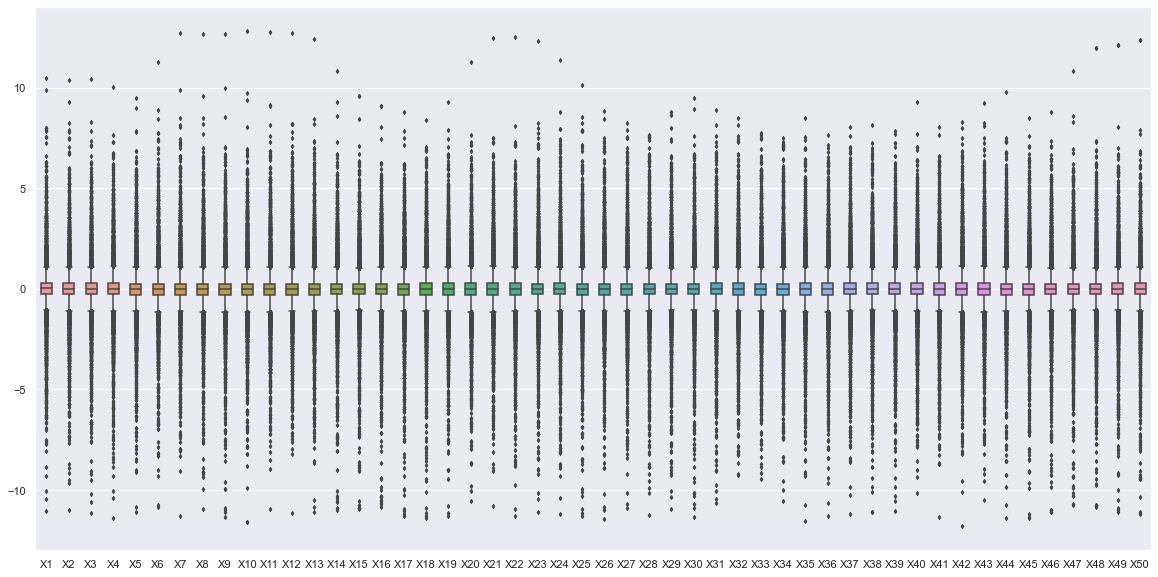

In [208]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df_X_scaled.iloc[:,0:50], width=0.5, ax=ax, fliersize=3)

<AxesSubplot:>

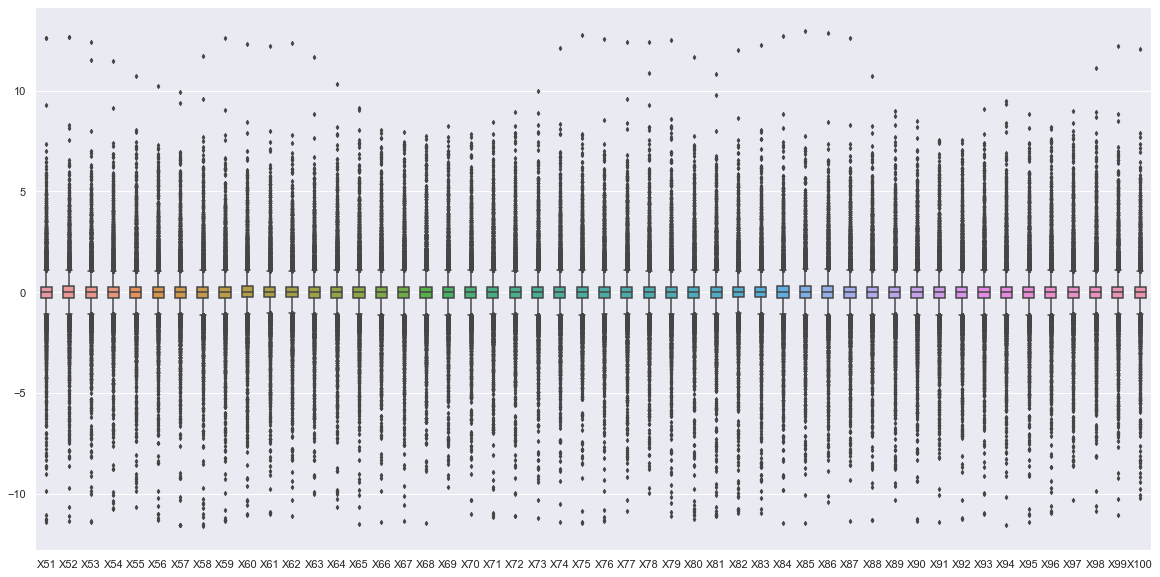

In [209]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df_X_scaled.iloc[:,50:100], width=0.5, ax=ax, fliersize=3)

<AxesSubplot:>

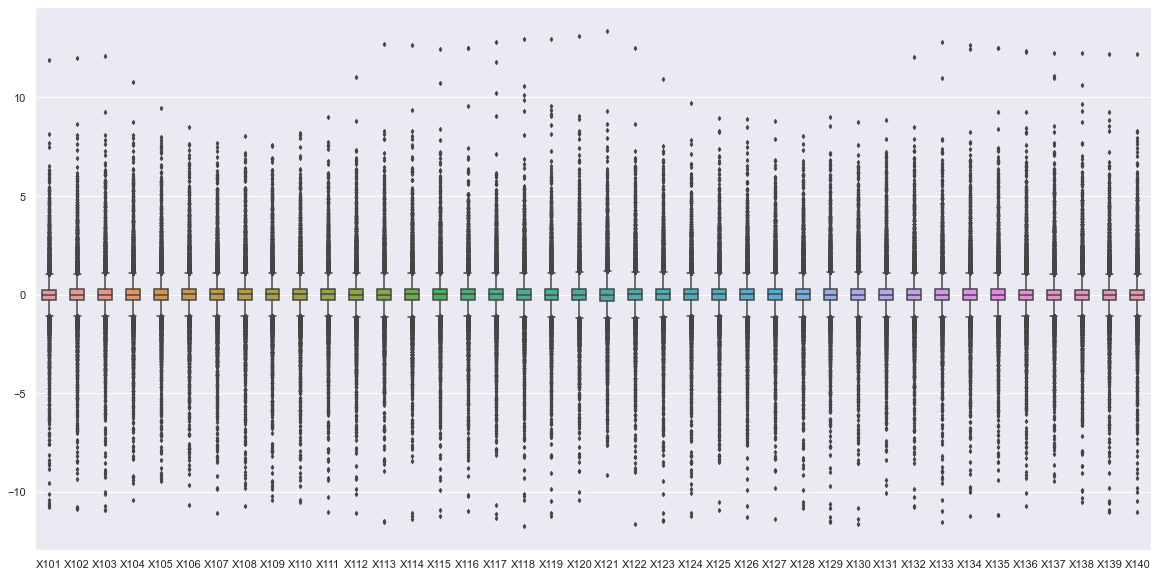

In [210]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df_X_scaled.iloc[:,100:140], width=0.5, ax=ax, fliersize=3)

<AxesSubplot:>

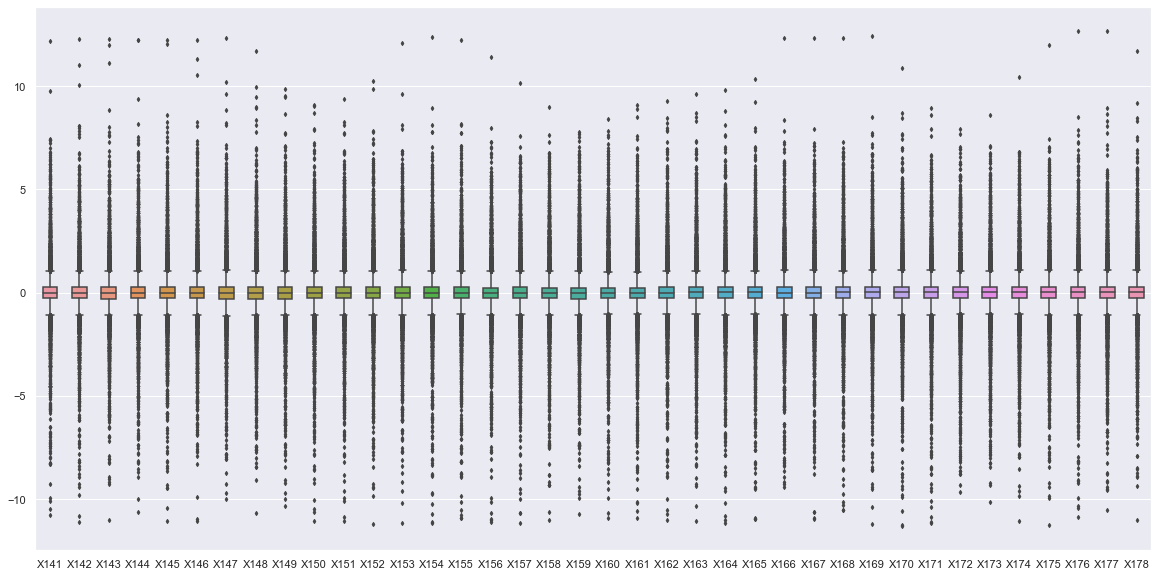

In [214]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df_X_scaled.iloc[:,140:178], width=0.5, ax=ax, fliersize=3)

In [215]:
print("*"*100)
print('From the above Box Plot, it can be seen that huge number of outliers are there for each dataset and deleteting them will result in significant data loss. Hence we chose to perform PCA and go for ensemble technique for dealing with outliers')
print("*"*100)

****************************************************************************************************
From the above Box Plot, it can be seen that huge number of outliers are there for each dataset and deleteting them will result in significant data loss. Hence we chose to perform PCA and go for ensemble technique for dealing with outliers
****************************************************************************************************


# PCA -> (To reduce multi-collinearity amongst the variables

In [24]:
#Implementing PCA to reduce features and removing multi-collinearity
var_ratio = {}
for i in range(0,178):
    pca = PCA(n_components = i)
    cr_pca = pca.fit(df_X_scaled)
    var_ratio[i] = sum(cr_pca.explained_variance_ratio_)

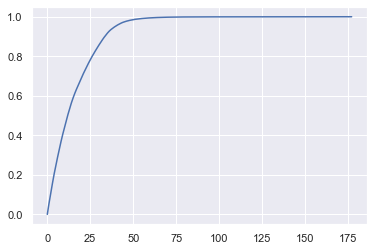

In [25]:
pd.Series(var_ratio).plot()
plt.savefig('pca_plot')

In [177]:
# Perform PCA with n_components = 50
pca = PCA(n_components=50)
#pca = PCA()
X_stand_pca = pca.fit_transform(df_X_scaled)

In [179]:
df_X_stand_pca = pd.DataFrame(X_stand_pca)

# Check for the VIF values after PCA

In [88]:
# VIF check after Standard Scaler & PCA

vif_check = pd.DataFrame()
vif_check["Features"] = df_X_stand_pca.columns
vif_check["vif"] = [variance_inflation_factor(X_stand_pca,i) for i in range(df_X_stand_pca.shape[1])]

In [92]:
print("*"*100)
print(min(vif_check["vif"]))
print(max(vif_check["vif"]))
print("From the VIF Score values, we can now see that the multi-colinearity problem has been addressed")
print("*"*100)

****************************************************************************************************
0.9999999999999998
1.0000000000000004
From the VIF Score values, we can now see that the multi-colinearity problem has been addressed
****************************************************************************************************


# Train & Test Split = 30:70

In [180]:
smt = SMOTE()

In [181]:
x_train , x_test , y_train , y_test = train_test_split(df_X_stand_pca , df_Y , test_size=0.3 , random_state = 101) 

In [182]:
xtrain_up , ytrain_up = smt.fit_sample(x_train , y_train)   # Apply SMOTE for class balance on train dataset by upsampling

In [183]:
xtrain_up.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,-0.130175,-0.359911,0.632340,-0.371047,0.011241,-0.227397,0.584811,-0.118593,1.826739,1.108977,-3.113056,-0.477692,0.067569,-1.938419,-1.402035,-0.406480,0.660992,-0.277145,-0.856624,-0.274132,-0.015733,-0.518701,-0.672126,0.206098,-0.012290,0.274560,0.044490,0.665308,-0.027415,0.363568,-0.036985,0.312303,-0.579429,0.244907,0.020100,0.036576,0.085262,-0.002540,0.244612,0.009894,-0.074551,0.147582,0.108804,0.155400,0.001938,0.155470,-0.213569,-0.108338,0.004288,0.035909,0.018543,0.088607,0.001092,0.010516,0.005988,0.081952,0.126207,0.125447,-0.013647,-0.038140,-0.137653,-0.080897,-0.003288,0.024897,-0.009637,-0.064787,0.004585,-0.017946,-0.002657,0.006576,-0.045607,0.010418,0.061422,0.060775,-0.013471,0.040656,0.039208,-0.048233,-0.014262,-0.026348,-0.025560,0.002549,0.017223,0.088764,-0.034303,-0.051150,-0.014110,-0.021513,-0.012433,0.005467,-0.009272,0.014344,0.019232,0.044654,-0.007730,0.042521,-0.027694,0.015791,0.025976,0.020790,-0.001749,0.009278,-0.046214,-0.049811,-0.030102,0.033460,-0.028124,-0.007891,-0.014425,0.022774,-0.043753,-0.009592,-0.001515,-0.031163,0.016126,-0.038290,0.013714,0.007089,0.027156,-0.039507,0.023859,-0.032932,-0.037476,-0.015152,0.022291,-0.016682,0.015849,-0.007395,-0.011590,-0.015176,0.014830,0.001705,0.018830,-0.015212,-0.007518,-0.039661,-0.008920,-0.015502,0.004893,0.022523,0.016219,0.011670,0.029953,-0.005387,-0.026558,-0.017538,0.007760,0.004125,0.033306,0.014927,-0.012036,-0.018697,0.015815,-0.017523,0.031568,-0.014500,0.000781,-0.023772,-0.016620,-0.001074,-0.009608,0.011172,0.018232,0.011689,-0.009315,0.009862,-0.025941,-0.015523,0.022600,-0.005106,0.009048,0.004826,-0.009588,0.007912,0.005951,0.005778,-0.000070,0.001893
1,-0.359864,-0.123468,1.174120,-1.084002,1.414446,-1.430454,0.240745,-2.614710,-0.182163,-1.671465,0.510843,-0.392512,-0.257513,-1.000120,1.290790,1.923854,2.299900,-3.348865,-0.813785,4.169580,-1.762248,0.489166,-1.412305,-0.419925,-0.663335,-3.024698,-1.017740,-1.836701,0.347327,-0.728917,-1.144372,1.117975,-1.323426,-0.049807,-2.001785,-0.422655,0.207943,0.936767,-0.002503,-0.006398,-0.492400,-0.707599,-0.583859,0.702001,-0.735493,-0.211102,-0.074035,-0.397996,-0.769909,-0.056105,0.109859,0.139127,-0.354361,-0.172585,-0.338728,-0.180566,-0.013421,-0.063830,-0.174424,-0.051873,-0.329363,0.004207,-0.125445,0.149413,-0.017770,-0.172411,-0.013394,0.280558,-0.210989,0.038405,-0.074882,0.034604,-0.067100,0.054842,-0.058388,0.052098,-0.018869,0.070962,-0.015393,-0.013492,-0.076259,0.097442,-0.033317,-0.178524,-0.017246,0.006053,0.005809,0.069890,-0.053899,0.025124,0.019592,-0.027112,-0.040986,0.002146,0.023456,-0.016242,0.026177,0.038884,-0.015967,-0.020997,-0.036879,0.029354,-0.010338,-0.011884,0.001107,0.005402,-0.014894,0.028640,0.015112,0.015980,0.011348,-0.019886,0.049974,0.011770,-0.024304,-0.036296,-0.032983,0.047351,-0.008685,-0.026658,0.029562,-0.002186,0.012990,-0.002393,0.025888,-0.010017,0.036881,0.012158,-0.009356,0.021465,-0.054290,-0.030808,-0.012751,0.018290,-0.016222,-0.017743,-0.027451,-0.000378,0.012496,0.067066,-0.020612,-0.011763,0.021805,0.028750,0.029658,-0.001111,-0.036569,-0.017899,-0.021263,-0.011634,-0.019953,0.032329,-0.037431,-0.032137,0.038117,-0.004989,-0.038232,-0.006102,0.019521,0.027592,0.012390,0.055532,0.008186,-0.040344,-0.016640,-0.015398,-0.051187,0.059141,0.063945,-0.001619,-0.005941,-0.008723,0.018547,0.047340,-0.008842,-0.029878,-0.021085

In [184]:
print('The original shape of train dataset: {}'.format(x_train.shape))
print('After upsampling, the shape of train dataset: {}'.format(xtrain_up.shape))

The original shape of train dataset: (8050, 178)
After upsampling, the shape of train dataset: (12838, 178)


In [185]:
print('The original shape of test dataset: {}'.format(y_train.shape))
print('After upsampling, the shape of test dataset: {}'.format(ytrain_up.shape))

The original shape of test dataset: (8050,)
After upsampling, the shape of test dataset: (12838,)


In [186]:
ytrain_up.value_counts()

1    6419
0    6419
Name: target_var, dtype: int64

# Build Model using RFC

In [187]:
rfc_up = RandomForestClassifier()
rfc_up.fit(xtrain_up,ytrain_up)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
confusion_matrix(rfc_up.predict(x_test),y_test)

array([[2666,    7],
       [ 115,  662]], dtype=int64)

In [189]:
print(classification_report(rfc_up.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2673
           1       0.99      0.85      0.92       777

    accuracy                           0.96      3450
   macro avg       0.97      0.92      0.95      3450
weighted avg       0.97      0.96      0.96      3450



In [229]:
test = RandomForestClassifier(n_jobs = -1)
rf_p_dist = {'max_depth':[3,5,7,10, None],
             'n_estimators': [10,100,200,300,400,500,600,700],
             'max_features': randint(1,14),
             'criterion': ['gini','entropy'],
             'bootstrap': [True, False],
             'min_samples_leaf': randint(1,5)
            }

In [230]:
def hypertuning_rf(test, p_dist, nbr_iter, X, Y):
    rdmsearch = RandomizedSearchCV(test, param_distributions=p_dist, n_iter = nbr_iter, cv=9)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [231]:
rf_parameters, rf_ht_score = hypertuning_rf(test, rf_p_dist, 20, xtrain_up, ytrain_up)

In [232]:
print(rf_parameters)
print(rf_ht_score)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'min_samples_leaf': 3, 'n_estimators': 300}
0.96128576871679


In [234]:
rfc_ht = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=10,max_features=11,min_samples_leaf=3,n_estimators=300)
rfc_ht.fit(xtrain_up,ytrain_up)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [235]:
confusion_matrix(rfc_ht.predict(x_test),y_test)

array([[2698,   16],
       [  83,  653]], dtype=int64)

In [236]:
print(classification_report(rfc_ht.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2714
           1       0.98      0.89      0.93       736

    accuracy                           0.97      3450
   macro avg       0.97      0.94      0.96      3450
weighted avg       0.97      0.97      0.97      3450



In [248]:
#Performing the Cross Validation and checking the scores to ensure that model is not overfitted.

In [246]:
scores_rfc_ht = cross_val_score(rfc_ht , xtrain_up , ytrain_up , cv = 7 , scoring = 'accuracy')

In [247]:
print(scores_rfc_ht.view())

[0.98146129 0.96183206 0.95201745 0.9563795  0.95474373 0.95747001
 0.95692475]


ROC Score Random Forest: 0.9406664517317612




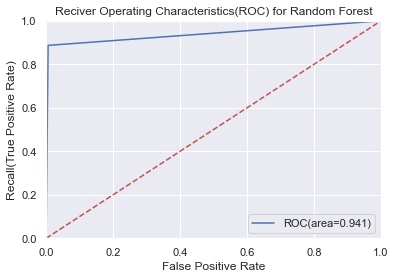

AUC: 0.9406664517317612


In [249]:
#ROC_AUC SCORE
roc_score = roc_auc_score(rfc_ht.predict(x_test), y_test)
print('ROC Score Random Forest:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(rfc_ht.predict(x_test), y_test)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Random Forest')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

# ADABoost Classifier

In [257]:
abc_up = AdaBoostClassifier()    # Adaboost classifier with upsampled data

In [258]:
abc_up.fit(xtrain_up,ytrain_up)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [259]:
confusion_matrix(abc_up.predict(x_test),y_test)

array([[2660,   41],
       [ 121,  628]], dtype=int64)

In [260]:
print(classification_report(abc_up.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2701
           1       0.94      0.84      0.89       749

    accuracy                           0.95      3450
   macro avg       0.95      0.91      0.93      3450
weighted avg       0.95      0.95      0.95      3450



In [132]:
# Hyperparameter tuning
rf_p_dist = {'n_estimators': [10,100,200,300,400,500,600,700],
             'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.5, 0.75],
             'algorithm' : ['SAMME', 'SAMME.R']
            }

def hypertuning_ada(test, p_dist, nbr_iter, X, Y):
    rdmsearch = RandomizedSearchCV(test, param_distributions=p_dist, n_iter = nbr_iter, cv=9)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

ada_parameters, ada_ht_score = hypertuning_ada(abc_up, rf_p_dist, 20, xtrain_up, ytrain_up)

print(ada_parameters)
print(ada_ht_score)

{'n_estimators': 700, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
0.9633886272874292


In [193]:
abc_ht = AdaBoostClassifier(n_estimators=700, learning_rate=0.5, algorithm='SAMME.R')

In [194]:
abc_ht.fit(xtrain_up,ytrain_up)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=700, random_state=None)

In [195]:
confusion_matrix(abc_ht.predict(x_test),y_test)

array([[2715,   22],
       [  66,  647]], dtype=int64)

In [196]:
print(classification_report(abc_ht.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2737
           1       0.97      0.91      0.94       713

    accuracy                           0.97      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.97      0.97      0.97      3450



# Support Vector Machine

In [86]:
svcmodel = SVC()

In [87]:
svcmodel.fit(xtrain_up , ytrain_up)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
confusion_matrix(svcmodel.predict(x_test),y_test)

array([[2714,   19],
       [  67,  650]], dtype=int64)

In [89]:
print(classification_report(svcmodel.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2733
           1       0.97      0.91      0.94       717

    accuracy                           0.98      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.98      0.98      0.97      3450



In [237]:
# Hyperparameter tuning
rf_p_dist = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

def hypertuning_svm(test, p_dist, nbr_iter, X, Y):
    rdmsearch = RandomizedSearchCV(test, param_distributions=p_dist, n_iter = nbr_iter, cv=9)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

svm_parameters, svm_ht_score = hypertuning_svm(svcmodel, rf_p_dist, 20, xtrain_up,ytrain_up)

print(svm_parameters)
print(svm_ht_score)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
0.9903412220015182


In [238]:
svcmodel_ht = SVC(kernel= 'rbf', gamma= 0.01, C= 10)
svcmodel_ht = svcmodel_ht.fit(xtrain_up, ytrain_up)

In [239]:
confusion_matrix(svcmodel_ht.predict(x_test),y_test)

array([[2740,   40],
       [  41,  629]], dtype=int64)

In [240]:
print(classification_report(svcmodel_ht.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2780
           1       0.94      0.94      0.94       670

    accuracy                           0.98      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.98      0.98      0.98      3450



ROC Score SVM: 0.9622087404703102




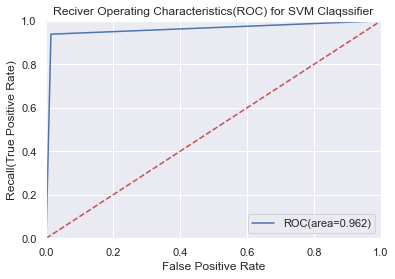

####################################################################################################
AUC Score for Best Model - Support Vector Machine: 0.9622087404703102
####################################################################################################


In [203]:
#ROC_AUC SCORE
roc_score=roc_auc_score(svcmodel_ht.predict(x_test),y_test)
print('ROC Score SVM:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(svcmodel_ht.predict(x_test),y_test)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for SVM Claqssifier')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('#'*100)
print('AUC Score for Best Model - Support Vector Machine:',roc_auc)
print('#'*100)

# K Nearest Neighbour

In [241]:
knn_up = KNeighborsClassifier(n_neighbors=5)

In [242]:
knn_up.fit(xtrain_up,ytrain_up)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [243]:
confusion_matrix(knn_up.predict(x_test),y_test)

array([[2756,  110],
       [  25,  559]], dtype=int64)

In [244]:
print(classification_report(knn_up.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2866
           1       0.84      0.96      0.89       584

    accuracy                           0.96      3450
   macro avg       0.91      0.96      0.93      3450
weighted avg       0.96      0.96      0.96      3450



# Chosing the K Value for KNN

In [245]:
accuracy = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_up,ytrain_up)
    knn_i = knn.predict(x_test)
    acc = confusion_matrix(knn.predict(x_test),y_test).diagonal().sum()/confusion_matrix(knn.predict(x_test),y_test).sum()
    accuracy.append(acc)

Text(0, 0.5, 'Score')

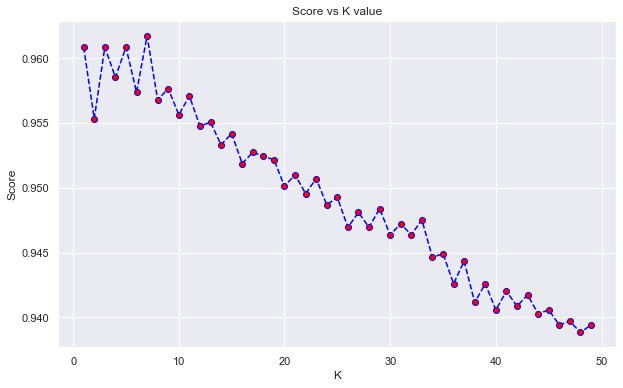

In [250]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy, color="blue", linestyle="dashed", marker = "o", markerfacecolor="red")
plt.title("Score vs K value")
plt.xlabel("K")
plt.ylabel("Score")

In [251]:
# K value identified as 42 from where the graph starts stabilising

In [252]:
# Build KNN model again with K value as 
knn_new = KNeighborsClassifier(n_neighbors=42)

knn_new.fit(xtrain_up,ytrain_up)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=42, p=2,
                     weights='uniform')

In [253]:
confusion_matrix(knn_new.predict(x_test),y_test)

array([[2768,  191],
       [  13,  478]], dtype=int64)

In [254]:
print(classification_report(knn_new.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.96      2959
           1       0.71      0.97      0.82       491

    accuracy                           0.94      3450
   macro avg       0.85      0.95      0.89      3450
weighted avg       0.96      0.94      0.94      3450



ROC Score KNN: 0.9544872937615161




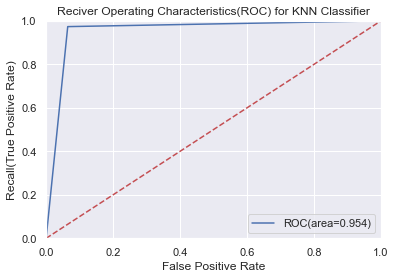

AUC: 0.9544872937615161


In [255]:
#ROC_AUC SCORE
roc_score=roc_auc_score(knn_new.predict(x_test),y_test)
print('ROC Score KNN:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(knn_new.predict(x_test),y_test)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for KNN Classifier')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

# AUTO ML - TPOT - Tree Based Pipeline Optimization Tool

In [217]:
tpot = TPOTClassifier(verbosity=2 , max_time_mins = 60)

In [218]:
tpot.fit(xtrain_up , ytrain_up)


62.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=5, p=2, weights=uniform)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=<ipykernel.iostream.OutStream object at 0x0000023001DE89C8>,
               max_eval_time_mins=5, max_time_mins=60, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [219]:
print(tpot.score(x_test,y_test))

0.9608695652173913


In [220]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [221]:
tpot.export('tpot_epiliptic_seiz_pipeline.py')

# Best pipeline given by TPOT is KNN classifier 

In [222]:
# Create model with best pipeline suggested by AUTO ML 

#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = tpot_data.drop('target', axis=1)
#training_features, testing_features, training_target, testing_target = \
#            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.9872257153155253
exported_pipeline = KNeighborsClassifier(n_neighbors=5, p=2, weights="uniform")

exported_pipeline.fit(xtrain_up, ytrain_up)
results = exported_pipeline.predict(x_test)

In [223]:
confusion_matrix(exported_pipeline.predict(x_test),y_test)

array([[2756,  110],
       [  25,  559]], dtype=int64)

In [224]:
print(classification_report(exported_pipeline.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2866
           1       0.84      0.96      0.89       584

    accuracy                           0.96      3450
   macro avg       0.91      0.96      0.93      3450
weighted avg       0.96      0.96      0.96      3450



# Hyperparameter tuned Support Vector Classifier gives better results than AUTO ML in terms of Accuracy, Precision, Recall and F1 Score given by

# Final model selected is Support Vector Classifier

In [204]:
# Creating the pickle file for the final model
# Writing different model files to file
with open( 'svmmodelForPrediction.sav', 'wb') as f:
    pickle.dump(svcmodel_ht,f)